In [1]:
!python --version

Python 3.10.14


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/ubuntu/ERAv2_S15/yolov9_ec2


In [2]:
!git clone https://github.com/SkalskiP/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 19.23 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/home/ubuntu/ERAv2_S15/yolov9_ec2/yolov9


In [3]:
%cd yolov9
!pip install -r requirements.txt -q

/home/ubuntu/ERAv2_S15/yolov9_ec2/yolov9


In [3]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [4]:
!ls -la {HOME}/weights

total 402440
drwxrwxr-x 2 ubuntu ubuntu      4096 Jun 28 18:55 .
drwxrwxr-x 4 ubuntu ubuntu      4096 Jun 28 18:55 ..
-rw-rw-r-- 1 ubuntu ubuntu  51508261 Feb 18 12:36 gelan-c.pt
-rw-rw-r-- 1 ubuntu ubuntu 117203713 Feb 18 12:36 gelan-e.pt
-rw-rw-r-- 1 ubuntu ubuntu 103153312 Feb 18 12:36 yolov9-c.pt
-rw-rw-r-- 1 ubuntu ubuntu 140217688 Feb 18 12:36 yolov9-e.pt


In [6]:
!ls -la {HOME}/customdata

total 24
drwxrwxr-x 4 ubuntu ubuntu 4096 Jun 28 18:57 .
drwxrwxr-x 5 ubuntu ubuntu 4096 Jun 28 18:57 ..
-rw-rw-r-- 1 ubuntu ubuntu   45 Jun 28 18:57 classes.txt
-rw-rw-r-- 1 ubuntu ubuntu  130 Jun 28 18:57 data.yaml
drwxrwxr-x 4 ubuntu ubuntu 4096 Jun 28 18:57 train
drwxrwxr-x 4 ubuntu ubuntu 4096 Jun 28 18:57 valid


In [4]:
!python train_dual.py \
--batch 8 --epochs 40 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--weights {HOME}/weights/yolov9-e.pt \
--cfg {HOME}/yolov9/models/detect/yolov9-e.yaml \
--hyp hyp.scratch-high.yaml \
--data {HOME}/customdata/data.yaml

train_dual: weights=/home/ubuntu/ERAv2_S15/yolov9_ec2/weights/yolov9-e.pt, cfg=/home/ubuntu/ERAv2_S15/yolov9_ec2/yolov9/models/detect/yolov9-e.yaml, data=/home/ubuntu/ERAv2_S15/yolov9_ec2/customdata/data.yaml, hyp=hyp.scratch-high.yaml, epochs=40, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla T4, 14931MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias

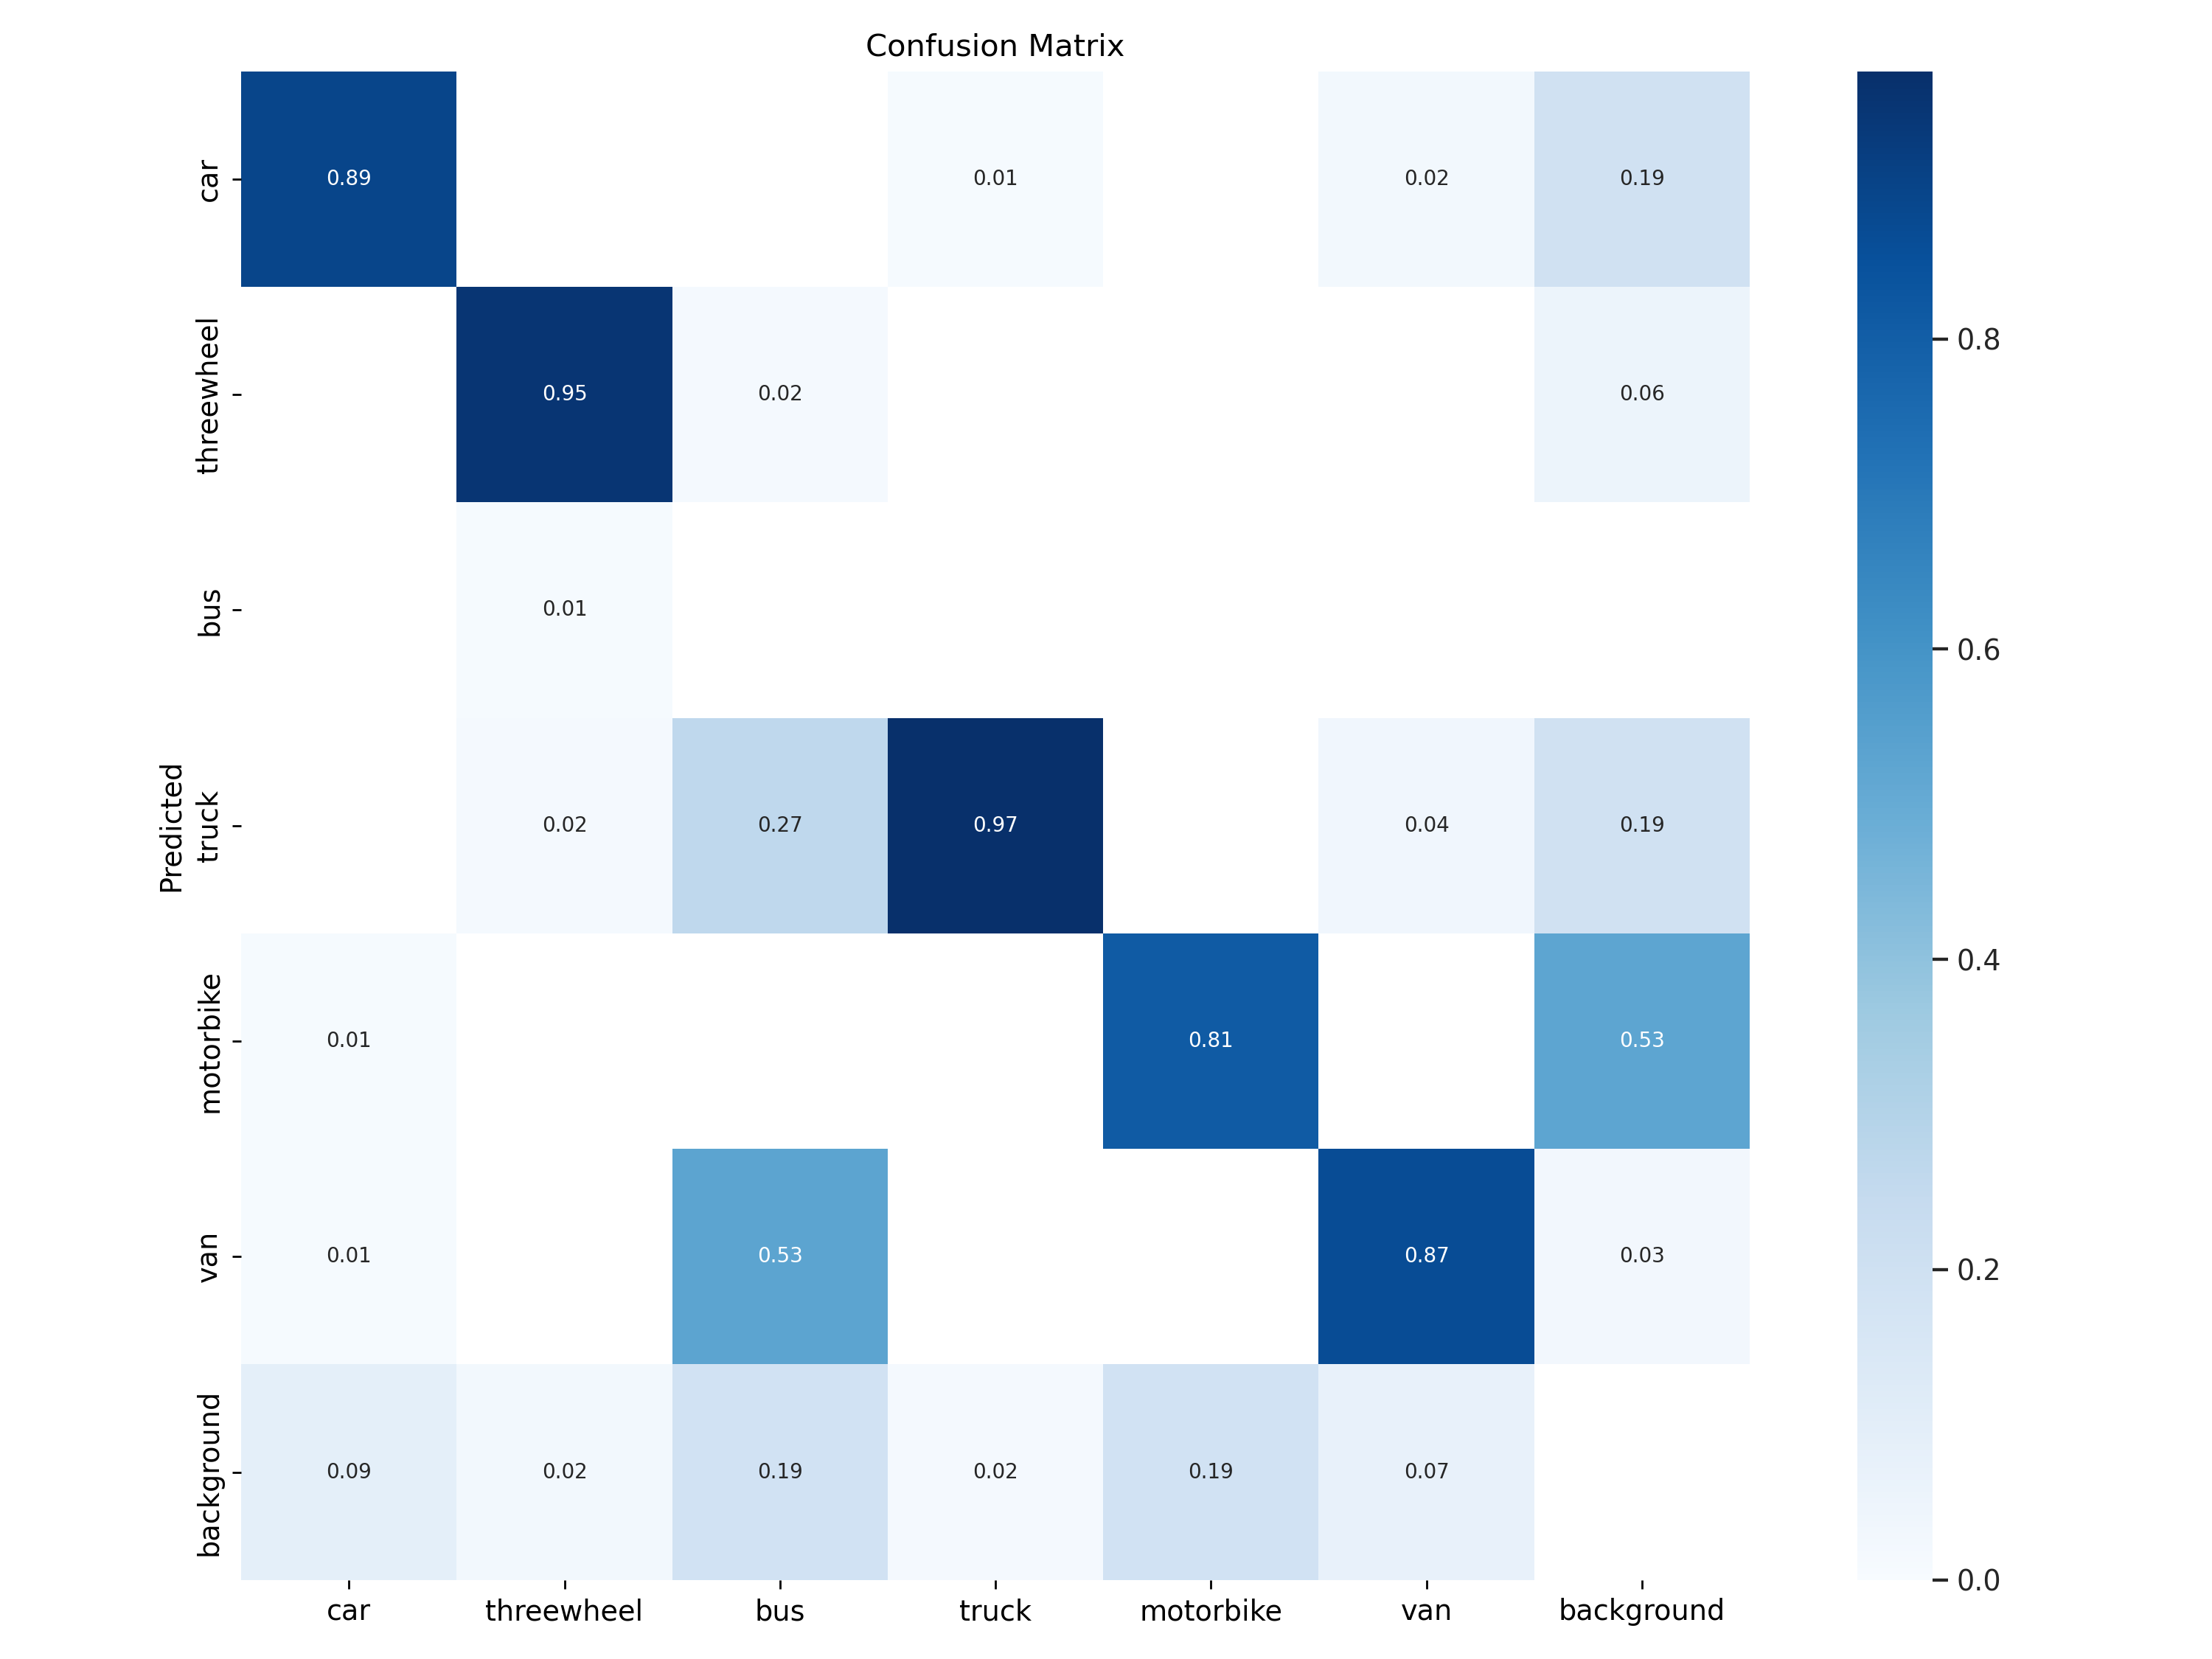

In [8]:
from IPython.display import Image
Image(filename=f"/home/ubuntu/ERAv2_S15/yolov9_ec2/yolov9/runs/train/exp5/confusion_matrix.png", width=1000)

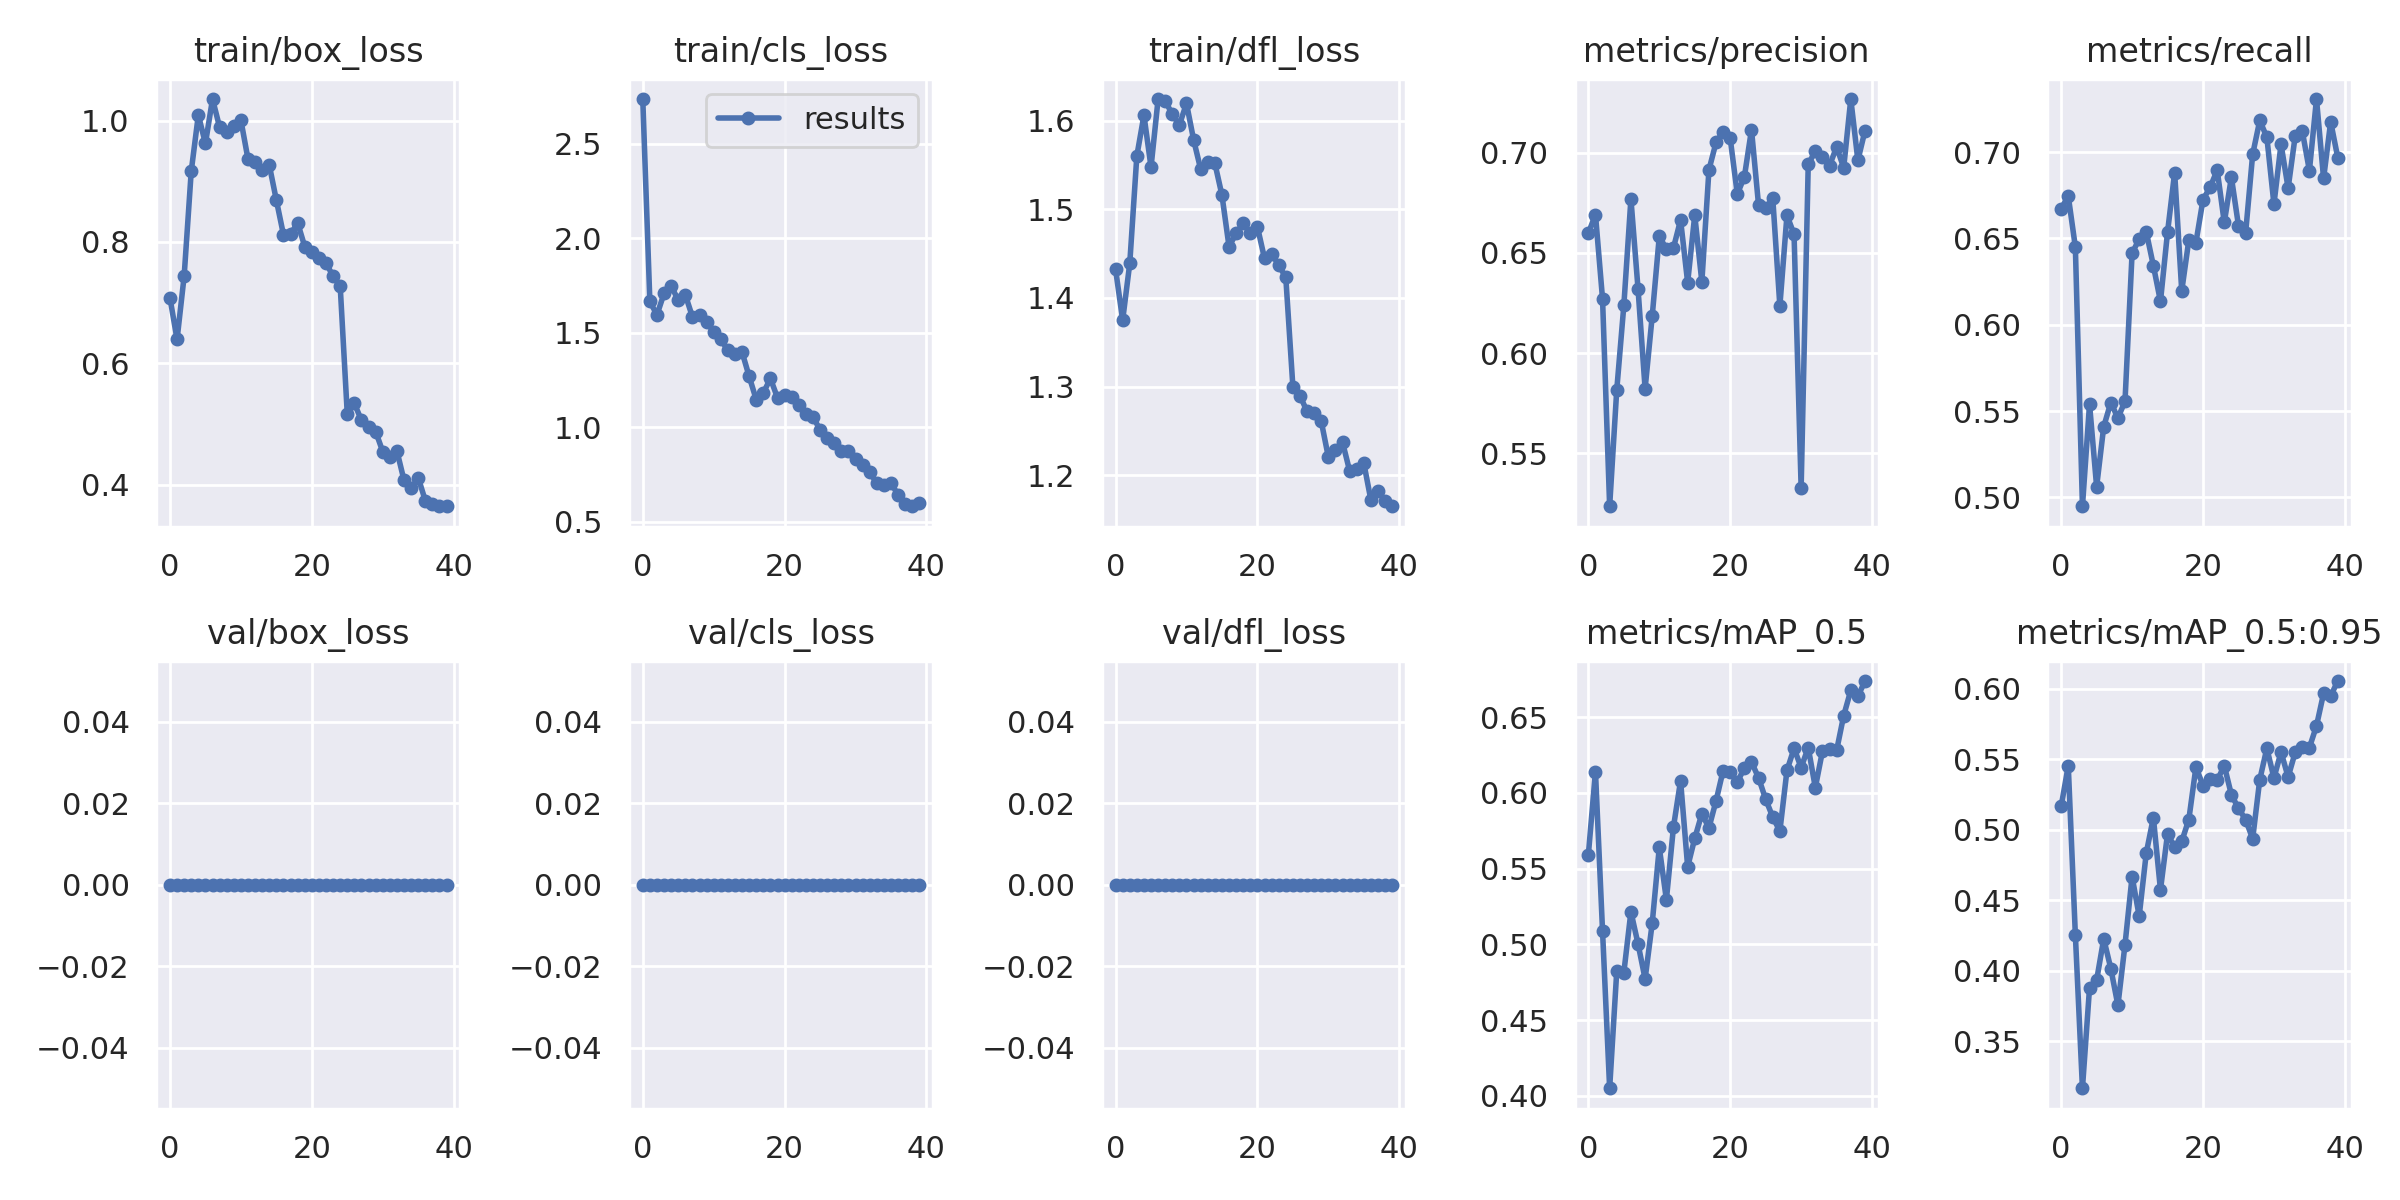

In [11]:
Image(filename=f"/home/ubuntu/ERAv2_S15/yolov9_ec2/yolov9/runs/train/exp5/results.png", width=1000)

detect: weights=['../weights/ERAv2_S15_best.pt'], source=../testData/city-cars2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla T4, 14931MiB)

Fusing layers... 
yolov9-e summary: 1119 layers, 69356036 parameters, 0 gradients, 243.3 GFLOPs
image 1/1 /home/ubuntu/ERAv2_S15/yolov9_ec2/testData/city-cars2.jpg: 416x640 4 cars, 145.4ms
Speed: 0.5ms pre-process, 145.4ms inference, 434.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


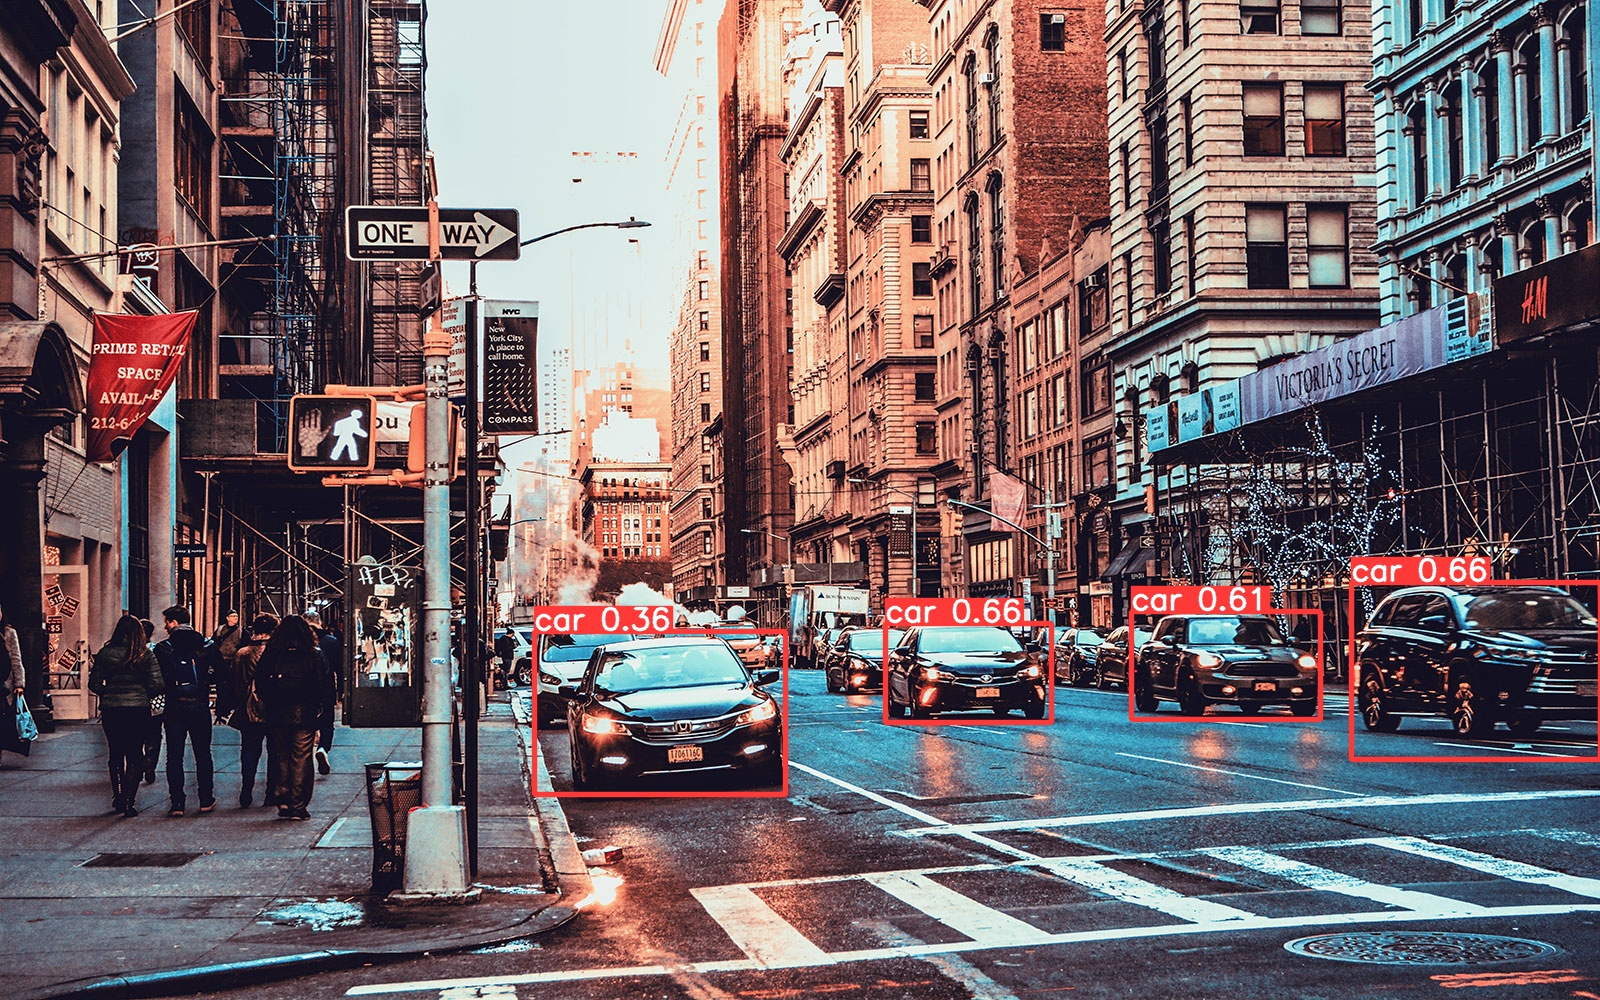

In [15]:
!wget -P ../testData -q https://knaufautomotive.com/wp-content/uploads/2020/07/city-cars2.jpg
!python detect.py --weights ../weights/ERAv2_S15_best.pt --source ../testData/city-cars2.jpg --device 0
Image(filename=f"runs/detect/exp3/city-cars2.jpg", width=1000)